In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("adult_updated.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,age,fnlwgt,education,educational-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,working,occupation
0,25,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,United-States,<=50K,Private,Machine-op-inspct
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,United-States,<=50K,Private,Farming-fishing
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,United-States,>50K,Local-gov,Protective-serv
3,44,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,United-States,>50K,Private,Machine-op-inspct
4,18,103497,Some-college,10,Never-married,Own-child,White,Female,0,0,30,United-States,<=50K,False,False


In [3]:
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'working', 'occupation'],
      dtype='object')

In [4]:
df.shape

(48842, 15)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital'}>],
       [<AxesSubplot:title={'center':'capital.1'}>,
        <AxesSubplot:title={'center':'hours'}>]], dtype=object)

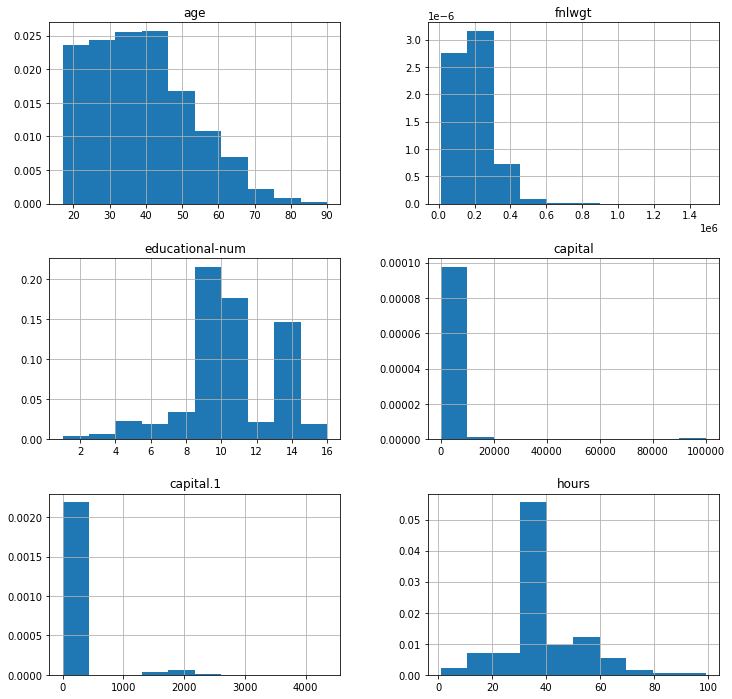

In [5]:
df.hist(density=True,figsize=(12,12))

## Observation1: There are a mixture of positive skews and negative skews among the other attributes


<BarContainer object of 10 artists>

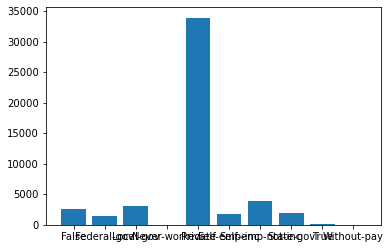

In [6]:
classes = df.groupby(['working'])['working'].count()
plt.bar(classes.index,classes
       )

## Observation: Private is highly dominating in workclass

<BarContainer object of 16 artists>

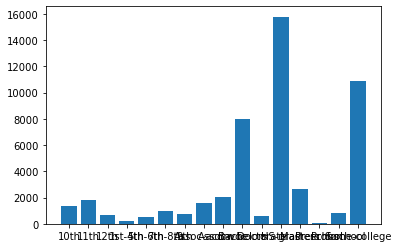

In [7]:
education = df.groupby(['education'])['education'].count()
plt.bar(education.index,education)


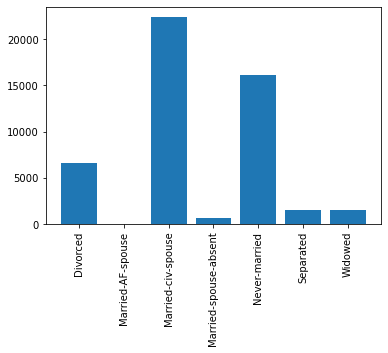

In [8]:
marital = df.groupby(['marital'])['marital'].count()
plt.bar(marital.index,marital)
plt.xticks(rotation = "vertical")
plt.show()

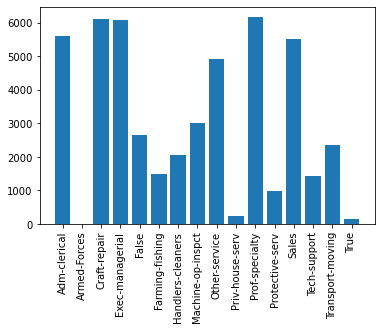

In [9]:
occupation = df.groupby(['occupation'])['occupation'].count()
plt.bar(occupation.index,occupation)
plt.xticks(rotation = "vertical")
plt.show()

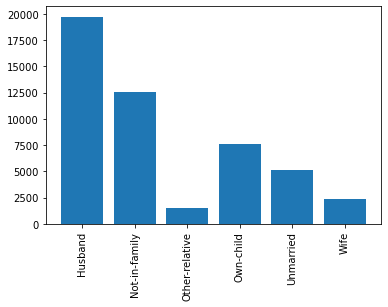

In [10]:
relationship = df.groupby(['relationship'])['relationship'].count()
plt.bar(relationship.index,relationship)
plt.xticks(rotation = "vertical")
plt.show()

## Observation: Husband is highly dominating in relationship column

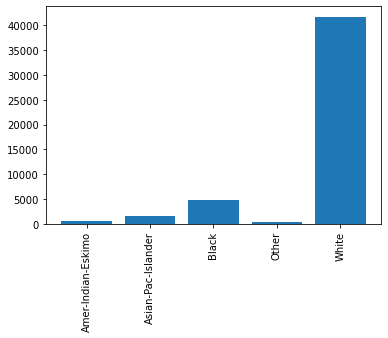

In [11]:
race = df.groupby(['race'])['race'].count()
plt.bar(race.index, race)
plt.xticks(rotation='vertical')
plt.show()

## Observation: White is highly dominating in Race column

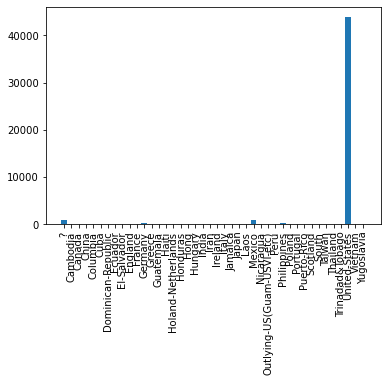

In [12]:
country =  df.groupby(['country'])['country'].count()
plt.bar(country.index,country)
plt.xticks(rotation='vertical')
plt.show()

## Observation: US is highly dominating in Country column

In [13]:
df.cov()

,age,fnlwgt,educational-num,capital,capital.1,hours
age,187.978083,-1.109486e+05,1.090628,7.890565e+03,314.637298,12.157262
fnlwgt,-110948.649105,1.115221e+10,-10523.722187,-2.916791e+06,-185818.540554,-17690.405781
educational-num,1.090628,-1.052372e+04,6.609901,2.397673e+03,83.896136,4.577651
capital,7890.565001,-2.916791e+06,2397.673247,5.553259e+07,-94422.847037,7586.507972
capital.1,314.637298,-1.858185e+05,83.896136,-9.442285e+04,162412.669033,271.998838
hours,12.157262,-1.769041e+04,4.577651,7.586508e+03,271.998838,153.547885


In [14]:
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'working', 'occupation'],
      dtype='object')

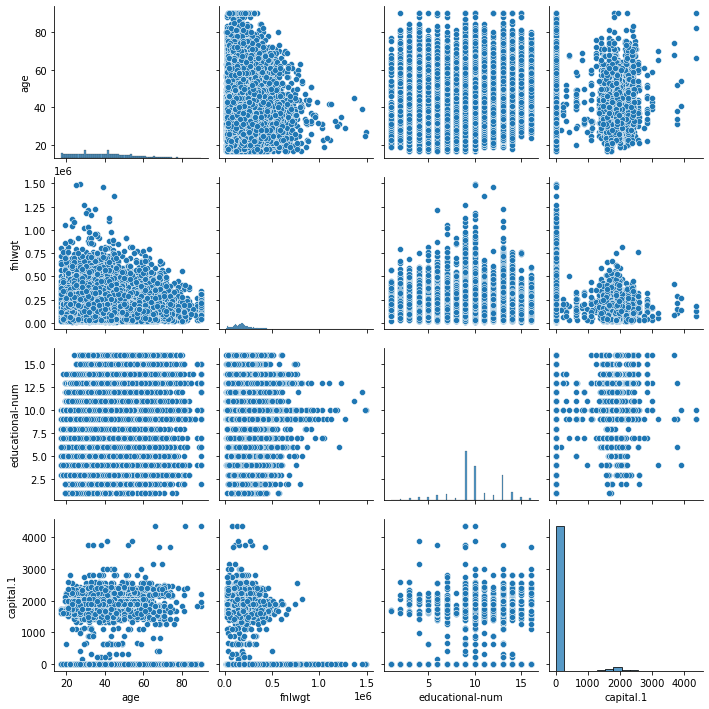

In [15]:
sns.pairplot(df.drop(columns=['marital', 'relationship', 'race', 'sex','capital','hours','working','occupation']))

<AxesSubplot:title={'center':'Heatmap Relation'}>

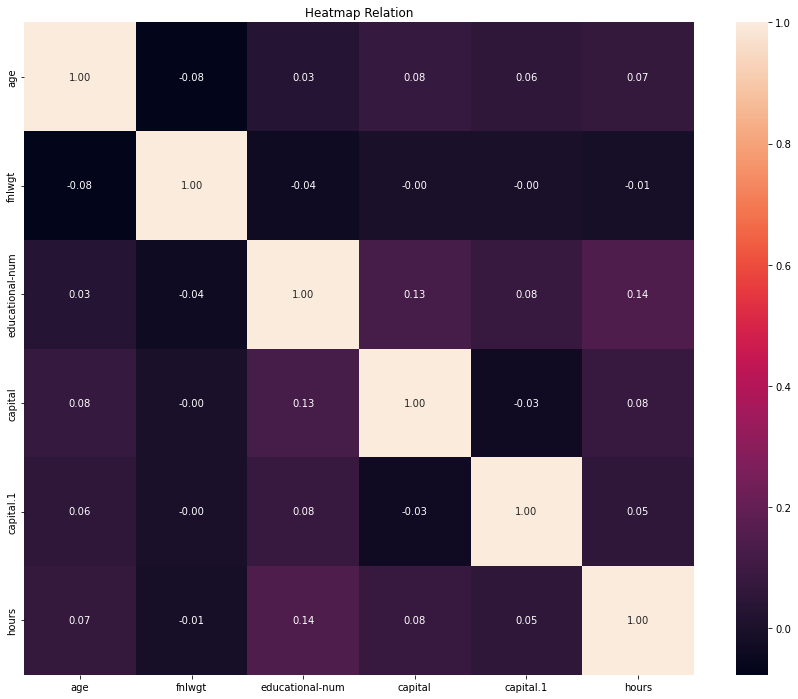

In [16]:
plt.figure(figsize=(15,12))
plt.title("Heatmap Relation")
sns.heatmap(df.corr(),annot=True, fmt = '.2f')

## Observation - Many features are showing -ve correaltion with dependent variable , So we can remove them to increase accuracy of our model

In [17]:
df1 = df.copy()
df1.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'working', 'occupation'],
      dtype='object')

<AxesSubplot:xlabel='age'>

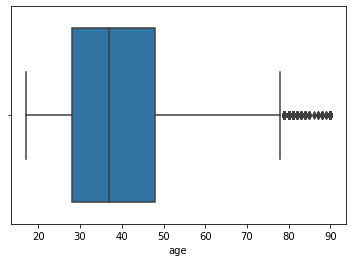

In [18]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='fnlwgt'>

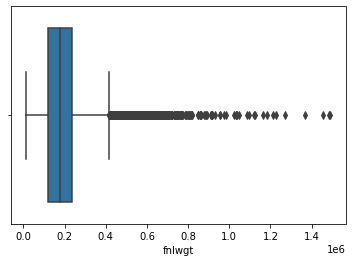

In [19]:
sns.boxplot(df1["fnlwgt"])

<AxesSubplot:xlabel='capital'>

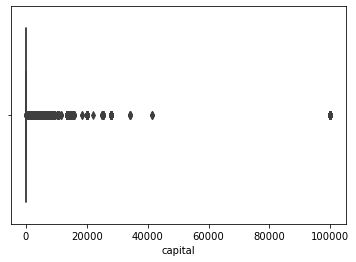

In [20]:
sns.boxplot(df1['capital'])

<AxesSubplot:xlabel='capital.1'>

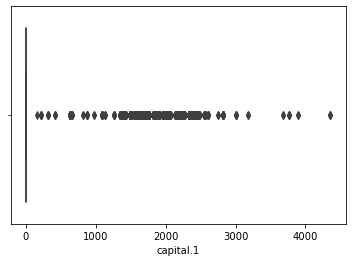

In [21]:
sns.boxplot(df["capital.1"])

<AxesSubplot:xlabel='hours'>

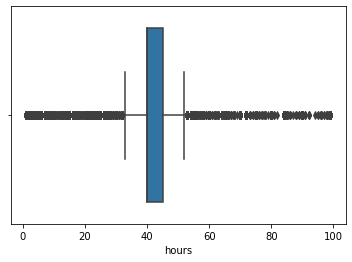

In [22]:
sns.boxplot(df["hours"])

##  Observation- Outliers are there in our data

# CHECKING FOR TRANSFORMATIONS

In [23]:
# log transformation

In [35]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    #plt.show()

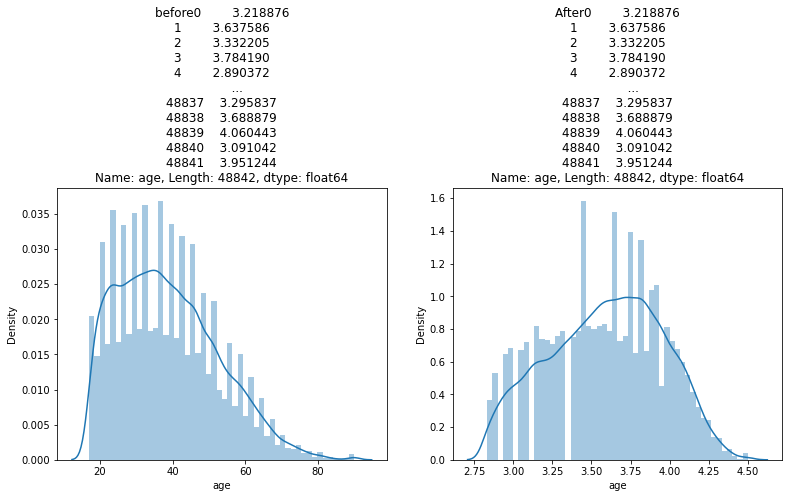

In [36]:
plots(df,'age',np.log(df["age"]))

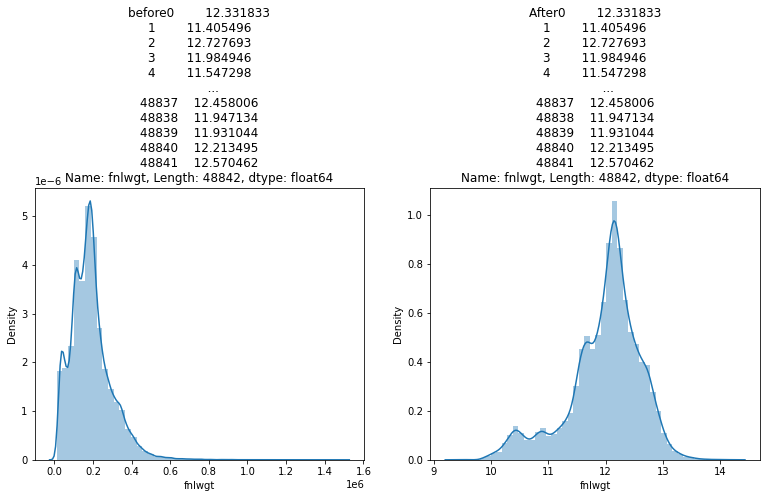

In [28]:
plots(df,'fnlwgt',np.log(df["fnlwgt"]))

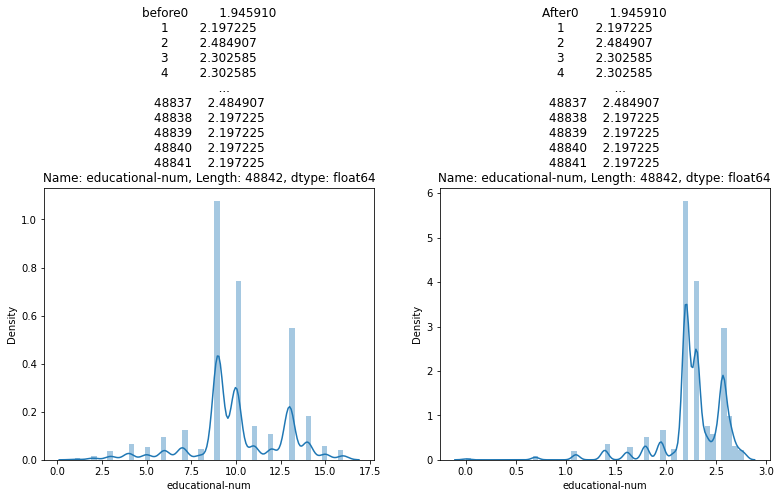

In [30]:
plots(df,'educational-num',np.log(df['educational-num']))


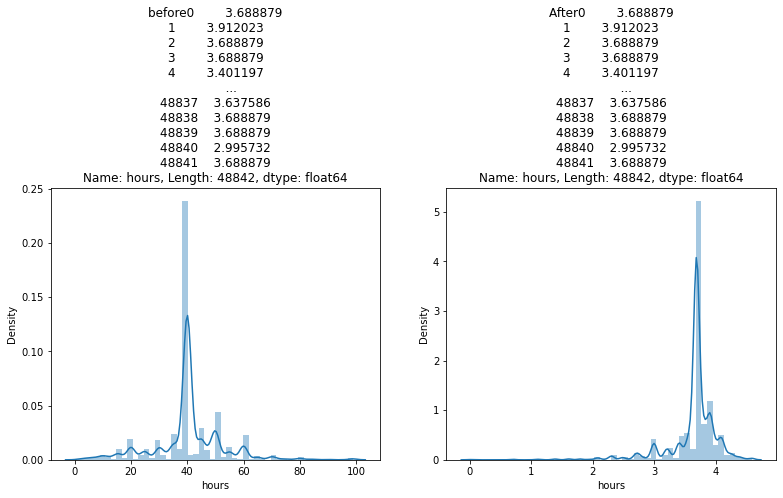

In [31]:
plots(df,'hours',np.log(df['hours']))


# Observation1 - As we can see in before /After Log transormation is working fine

## Observation2 : After Applying function transformmers , some skewness fixed

#  Applying Power Transformers

In [40]:
def PowTran(df,var):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title(var + "PDF")
    
    plt.subplot(122)
    stats.probplot(df[var],dist="norm",plot=plt)
    plt.title(var + "QQ Plot")
    
    plt.show()

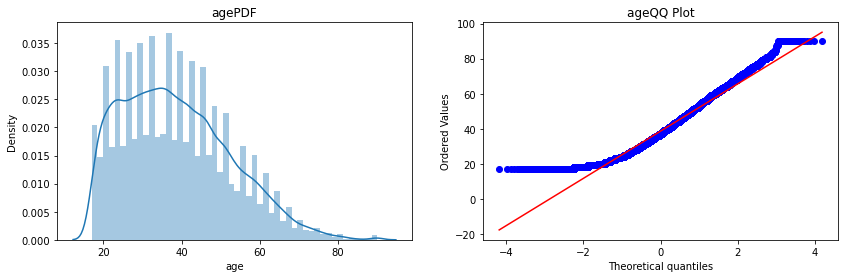

In [41]:
PowTran(df,"age")

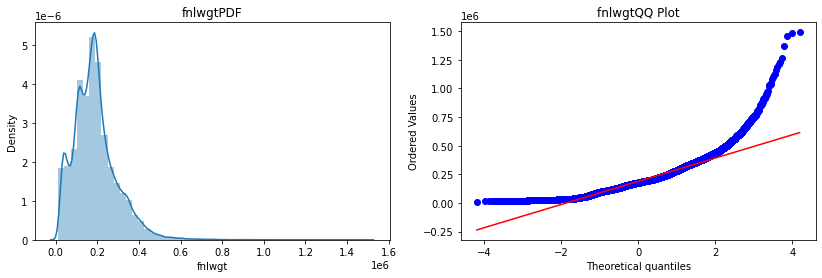

In [42]:
PowTran(df,"fnlwgt")

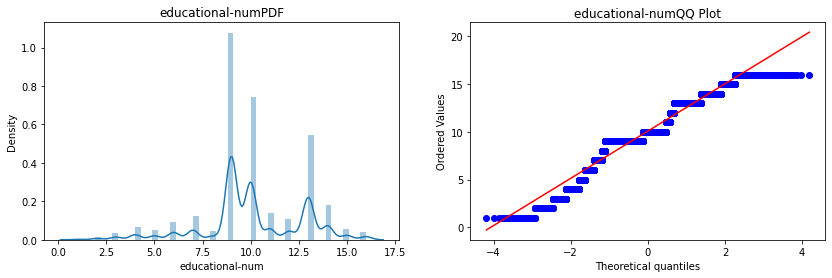

In [43]:
PowTran(df,"educational-num")

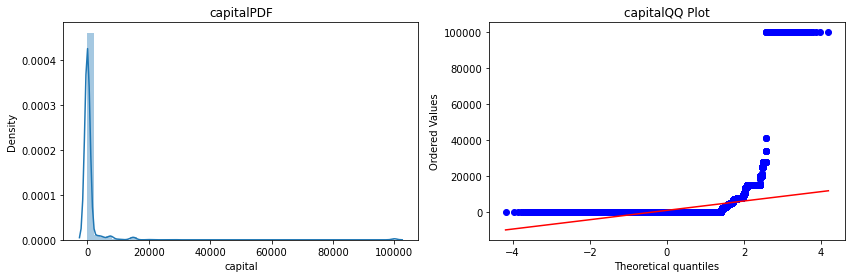

In [44]:
PowTran(df,'capital')

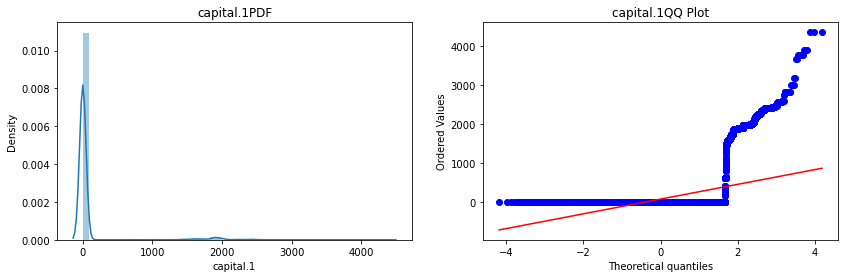

In [45]:
PowTran(df,'capital.1')

# Observation1 : We can see function transformers are working better than Power Transformers